In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def import_data(detector:str, mass_ratio):
    """Import data computed from scr/rayleigh_criterion_two_modes.py
    
    Parameters
    ----------
    detector : str
        Gravitational wave detector name. Must be {'LIGO', 'LISA',
        'CE' = 'CE2silicon', 'CE2silica', 'ET'}.
    mass_ratio : TYPE
        Binary black hole mass ratio. mass_ratio >= 1. This is used to
        determine the QNM parameters.
    
    Returns
    -------
    Pandas DataFrame
        Return DataFrame with the data
    """
    columns = ('mass',
               'redshift',
               'mode_0',
               'mode_1',
               'freq_0',
               'sigma_freq_0',
               'freq_1',
               'sigma_freq_1',
               'tau_0',
               'sigma_tau_0',
               'tau_1',
               'sigma_tau_1',
               'A',
               'R',
              )

    df = pd.read_csv(f'../data/parameters_dependence_errors/{detector}_q_{mass_ratio}_amplitude_and_ratio.dat', delimiter = "\t", comment="#", names=columns)
    df['mass_ratio'] = [mass_ratio]*len(df.mass)
    
    return df

In [4]:
# import all data
detectors = ["LIGO"]#, "ET", "CE", "LISA"]
df = pd.DataFrame()

for q in [1.5, 10]:
    for detector in detectors:
        df = df.append(import_data(detector, q))
df


,mass,redshift,mode_0,mode_1,freq_0,sigma_freq_0,freq_1,sigma_freq_1,tau_0,sigma_tau_0,tau_1,sigma_tau_1,A,R,mass_ratio
0,100,0.1,"(2,2,0)","(2,2,1) II",152.004139,5.409149,148.334554,81.124044,0.006605,0.004537,0.002183,0.007101,0.304406,0.416647,1.5
1,100,0.1,"(2,2,0)","(2,2,1) II",152.004139,6.263225,148.334554,32.551075,0.006605,0.005253,0.002183,0.002849,0.262896,1.202323,1.5
2,100,0.1,"(2,2,0)","(2,2,1) II",152.004139,8.206984,148.334554,148.550568,0.006605,0.006883,0.002183,0.013003,0.200631,0.345222,1.5
3,100,0.1,"(2,2,0)","(2,2,1) II",152.004139,5.063884,148.334554,45.052660,0.006605,0.004247,0.002183,0.003943,0.325161,0.702347,1.5
4,100,0.1,"(2,2,0)","(2,2,1) II",152.004139,7.437580,148.334554,73.662162,0.006605,0.006238,0.002183,0.006448,0.221386,0.630922,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,100,0.1,"(2,2,0)","(2,2,1) II",121.124144,7.751802,114.676252,288.178657,0.006158,0.005886,0.002013,0.018402,0.278846,0.233274,10.0
896,100,0.1,"(2,2,0)","(2,2,1) II",121.124144,8.174628,114.676252,84.740647,0.006158,0.006207,0.002013,0.005411,0.264423,0.836569,10.0
897,100,0.1,"(2,2,0)","(2,2,1) II",121.124144,7.751802,114.676252,261.161908,0.006158,0.005886,0.002013,0.016677,0.278846,0.257406,10.0
898,100,0.1,"(2,2,0)","(2,2,1) II",121.124144,7.751802,114.676252,238.776601,0.006158,0.005886,0.002013,0.015248,0.278846,0.281538,10.0


Text(0, 0.5, 'R')

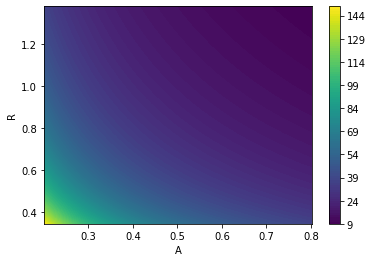

In [9]:
df_plot = df[df.mass_ratio == 1.5]
plt.tricontourf(df_plot.A, df_plot.R, df_plot.sigma_freq_1, levels = 100)
# plt.scatter(df_plot.A, df_plot.R, c = df_plot.sigma_freq_1)
plt.colorbar()
plt.xlabel('A')
plt.ylabel('R')